# Data loaders format testing

### Arabic datset loading

In [14]:
import numpy as np
from dataloader import TrainTestDataset

path = 'data/felix/datasets/arabic'
train, val, test = TrainTestDataset.get_datasets(path=path)

print("DATA:")
print(f"train: {path} {len(train)}")
print(f"valid: {path} {len(val)}")
print(f"test: {path} {len(test)}")

DATA:
train: data/felix/datasets/arabic 1
valid: data/felix/datasets/arabic 1
test: data/felix/datasets/arabic 2


In [15]:
random_sample = 0
display(test[random_sample][0])
N = 15 # how much data to show
print()
print('AUDIO =    ', test[random_sample][1][:N])
print()
print('PHONEMES = ', test[random_sample][2][:N])
print()
print('LENGTH =   ', test[random_sample][3])
print()
print('PATH =    ', test[random_sample][4])

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.1035e-05, 6.1035e-05,
        6.1035e-05])


AUDIO =     [8.0, 16.0, 21.0, 25.0, 36.0, 49.0, 57.0, 68.0, 76.0, 88.0, 95.0, 107.0, 114.0, 123.0, 129.0]

PHONEMES =  ['sil', 'w', 'a', 'r', "a'", 'jj', 'A', 'H', 'a', 'tt', 'A', 'q', 'r', "ii0'", 'r']

LENGTH =    1525

PATH =     data/felix/datasets/arabic/test/0002.wav


### TIMIT datset loading

In [3]:
import numpy as np
from dataloader import TrainTestDataset

path = 'data/felix/datasets/timit'
train, val, test = TrainTestDataset.get_datasets(path=path)

print("DATA:")
print(f"train: {path} {len(train)}")
print(f"valid: {path} {len(val)}")
print(f"test: {path} {len(test)}")

DATA:
train: data/felix/datasets/timit 4158
valid: data/felix/datasets/timit 462
test: data/felix/datasets/timit 1680


In [4]:
random_sample = 1267
display(test[random_sample][0])
N = 20022 # how much data to show
print()
print('AUDIO =    ', test[random_sample][1][:N])
print()
print('PHONEMES = ', test[random_sample][2][:N])
print()
print('LENGTH =   ', test[random_sample][3])
print()
print('PATH =    ', test[random_sample][4])

tensor([7.6294e-04, 9.1553e-04, 6.1035e-04,  ..., 3.0518e-04, 6.1035e-05,
        4.5776e-04])


AUDIO =     [18.0, 25.0, 37.0, 40.0, 49.0, 57.0, 62.0, 69.0, 74.0, 78.0, 79.0, 93.0, 101.0, 108.0, 111.0, 115.0, 130.0, 139.0, 145.0, 154.0, 161.0, 171.0, 173.0, 180.0, 197.0, 208.0, 212.0, 216.0, 224.0, 233.0, 238.0, 241.0, 243.0, 262.0, 267.0, 273.0, 278.0, 298.0, 306.0]

PHONEMES =  ['h#', 'l', 'ay', 'dx', 'ih', 'dcl', 'w', 'ih', 'n', 'dcl', 'd', 'ow', 'z', 'gcl', 'g', 'l', 'ow', 'dcl', 'jh', 'ux', 'l', 'bcl', 'b', 'r', 'ay', 'tcl', 'th', 'r', 'ux', 'dh', 'ix', 'dcl', 'd', 'aw', 'n', 'pcl', 'p', 'ao', 'r', 'h#']

LENGTH =    321

PATH =     data/felix/datasets/timit/test/timit_big_data_TEST_DR5_FNLP0_SI1938.wav


## Save real bounds

In [6]:
import h5py

with h5py.File('Realbounds.hdf5', 'w') as f:
        f.close()

for num in range(len(test)):
    with h5py.File('Realbounds.hdf5', 'a') as f:
        length = len(f.keys())
        for i in range(1):
            f.create_dataset('real_bound_'+str(i + length), data = np.array(test[num][1]))
        f.close()

In [7]:
realbounds = []
with h5py.File('Realbounds.hdf5', 'r') as f:
    print('realbounds file ',len(f.keys()))
    for i in range(int(len(f.keys()))):
        realbounds.append(f['real_bound_'+str(i)][:])
len(realbounds)

realbounds file  1680


1680

### BUCKEYE datset loading

In [8]:
import numpy as np
from dataloader import TrainValTestDataset

path = 'data/felix/datasets/buckeye'
train, val, test = TrainValTestDataset.get_datasets(path=path)

print("DATA:")
print(f"train: {path} {len(train)}")
print(f"valid: {path} {len(val)}")
print(f"test: {path} {len(test)}")

DATA:
train: data/felix/datasets/buckeye 204
valid: data/felix/datasets/buckeye 25
test: data/felix/datasets/buckeye 25


In [9]:
random_sample = 0
display(test[random_sample][0])
N = 15 # how much data to show
print()
print('AUDIO =    ', test[random_sample][1][:N])
print()
print('PHONEMES = ', test[random_sample][2][:N])
print()
print('LENGTH =   ', test[random_sample][3])
print()
print('PATH =    ', test[random_sample][4])

tensor([-0.0009, -0.0009, -0.0007,  ...,  0.0001, -0.0003, -0.0003])


AUDIO =     [0.0, 10.0, 13.0, 17.0, 28.0, 36.0, 42.0, 45.0, 50.0, 58.0, 64.0, 68.0, 71.0, 76.0, 83.0]

PHONEMES =  ['ng', 'ih', 'th', '{B_TRANS}', 'IVER', 'ih', 'z', 'ih', 'k;', 's', 't', 'r', 'ao', 'r;', 'd;']

LENGTH =    4927

PATH =     data/felix/datasets/buckeye/test/s3201b.wav


In [1]:
import yaml
import os
import random
import socket
from argparse import Namespace
from distutils.dir_util import copy_tree

import hydra
import numpy as np
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from torch.backends import cudnn

from solver import Solver
torch.autograd.set_detect_anomaly(True)

import h5py

def main():
    # create file for spectrum
#     with h5py.File('Spectrum.hdf5', 'w') as f:
#         f.close()
    
    with open('config.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
        cfg = yaml.load(file, Loader=yaml.FullLoader)
    cfg = Namespace(**dict(cfg))
    print(cfg)
    
    torch.manual_seed(cfg.seed)
    np.random.seed(cfg.seed)
    random.seed(cfg.seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    print(f"running in: {os.getcwd()}")
    cfg.wd = os.getcwd()
    cfg.host = socket.gethostname()
    cfg.project = "default" if not hasattr(cfg, "project") else cfg.project
        
    print(cfg.data)
    checkpoint_callback = ModelCheckpoint(
        filepath=os.getcwd(),
        save_top_k=1,
        verbose=True,
        monitor=cfg.early_stop_metric,
        mode=cfg.early_stop_mode,
        prefix='',
    )

    trainer = Trainer(
        checkpoint_callback=checkpoint_callback,
        early_stop_callback=None,
        distributed_backend="dp",
        show_progress_bar=True,
        num_sanity_val_steps=0,
        track_grad_norm=2,
        print_nan_grads=True,
        gpus=cfg.gpus,
        gradient_clip_val=cfg.grad_clip,
        val_check_interval=cfg.val_check_interval,
        fast_dev_run=cfg.dev_run,
        max_epochs=cfg.epochs
    )

    if cfg.ckpt is not None:
        ckpt = cfg.ckpt
    else:
        solver = Solver(cfg)
        print(solver)
        print(dir(solver))

        print('START FITTING')
        trainer.fit(solver)
        print('END FITTING')

        ckpt = solver.get_ckpt_path()

    print(f"running test on ckpt: {ckpt}")
    print(f"testing for {cfg.data.upper()}")
    solver = Solver.load_from_checkpoint(ckpt)

    # override checkpoint paths with current conf paths
    solver.hp.timit_path = cfg.timit_path
    solver.hp.buckeye_path = cfg.buckeye_path
    solver.hp.arabic_path = cfg.arabic_path
    solver.hp.libri_path = cfg.libri_path
    
    solver.hp.data = cfg.data
    
    print('START TEST')
    trainer.test(solver)
    print('END TEST')

if __name__ == "__main__":
    main()

/home/stas/anaconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Checkpoint directory /home/stas/ML_project exists and is not empty with save_top_k != 0.All files in this directory will be deleted when a checkpoint is saved!
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]


Namespace(arabic_path='data/felix/datasets/arabic', batch_shuffle=False, batch_size=8, buckeye_path='data/felix/datasets/buckeye', buckeye_percent=1.0, ckpt='/home/stas/ML_project/Trained/epoch=6.ckpt', cosine_coef=1.0, data='timit', dataloader_n_workers=10, dev_run=False, early_stop_metric='val_max_rval', early_stop_mode='max', epochs=1, exp_name='stas_eaxps', gpus=1, grad_clip=0.5, host='None', hydra={'run': {'dir': '${now:%Y-%m-%d_%H-%M-%S}-${exp_name}'}}, latent_dim=0, libri_path='data/felix/datasets/librispeech', libri_percent=1.0, libri_subset='train-clean-100', lr=0.0001, lr_anneal_gamma=1.0, lr_anneal_step=1000, momentum=0.9, n_negatives=3, optimizer='adam', overfit_pct=1, pred_offset=0, pred_steps=1, project='unsupervised_segmentor', seed=100, tag='default', timit_path='data/felix/datasets/timit', val_check_interval=0.2, val_ratio=0.1, wd='None', z_dim=256, z_proj=64, z_proj_dropout=0, z_proj_linear=True)
running in: /home/stas/ML_project
timit
running test on ckpt: /home/stas

wandb: Wandb version 0.10.22 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


MODEL:
learning features from raw wav
prediction steps: [1]
------------------------------------------------------------------------------------------
START TEST
------------------------------------------------------------------------------------------
TIMIT DATASET LOADED - OK:
------------------------------------------------------------------------------------------
4158 462 2
------------------------------------------------------------------------------------------
DATA:
train: data/felix/datasets/timit/train 4158
valid: data/felix/datasets/timit/train 462
test: data/felix/datasets/timit/test 2
------------------------------------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0.0005
)
------------------------------------------------------------------------------------------


/home/stas/anaconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You passed  in a `test_dataloader` and have defined a `test_step()`, you may also want to define `test_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
/home/stas/anaconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
/home/stas/anaconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `test_dataloader()` and have defined a `test_step()`, you may also want to define `test_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)


cuda:0
------------------------------------------------------------------------------------------
using pre-defined peak detection values - cpc_1 - {'prominence': 0.05, 'width': None, 'distance': None, 'epoch': 5}
calculating metrics using 2 entries
best peak detection params: (None, 0.05, None) (width, prominence, distance)
	train_nfc_loss                 -- nan
	test_nfc_loss                  -- 1.4775855541229248
	epoch                          -- 1
	current_lr                     -- 0.0001
	timit_test_cpc_1_f1            -- 0.6800377332136581
	timit_test_cpc_1_precision     -- 0.5869564579395155
	timit_test_cpc_1_recall        -- 0.808219067367251
	timit_test_cpc_1_rval          -- 0.5874448228581622
	timit_test_cpc_1_max_rval      -- 0.5874448228581622
	timit_test_cpc_1_max_rval_epoch -- 0
	test_max_rval                  -- 0.5874448228581622
------------------------------------------------------------------------------------------
-------------------------------------------------

/home/stas/ML_project/utils.py:169: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
/home/stas/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [35]:
import h5py
import numpy as np
with h5py.File('Spectrum.hdf5', 'r') as f:
    print(len(f.keys()))

1680


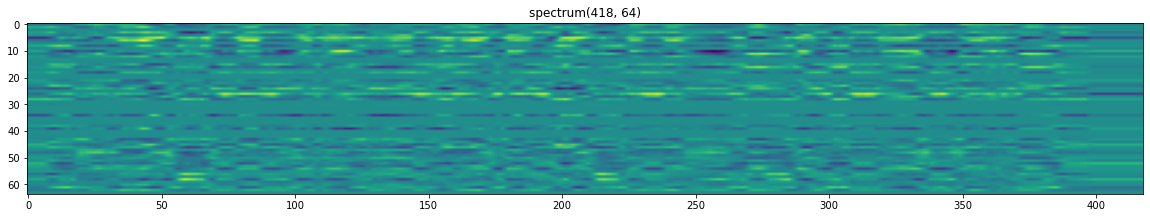

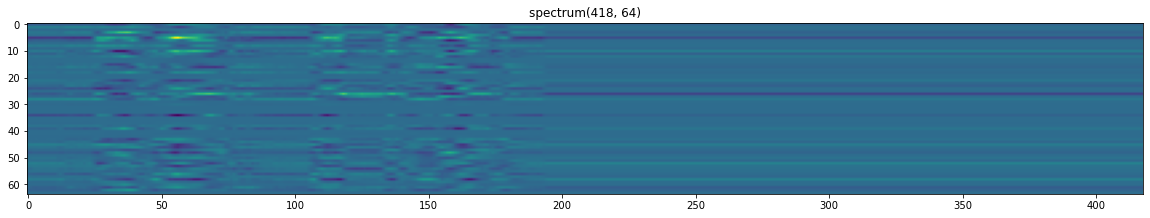

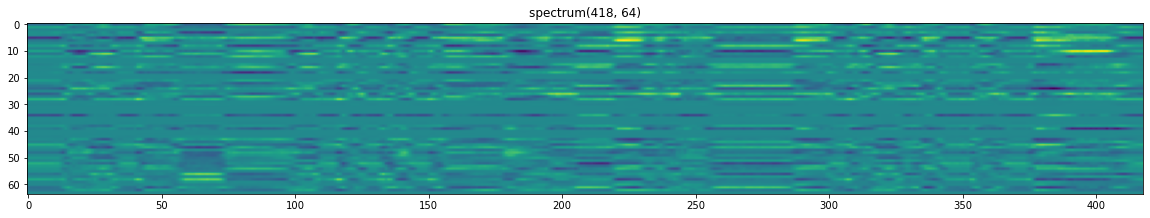

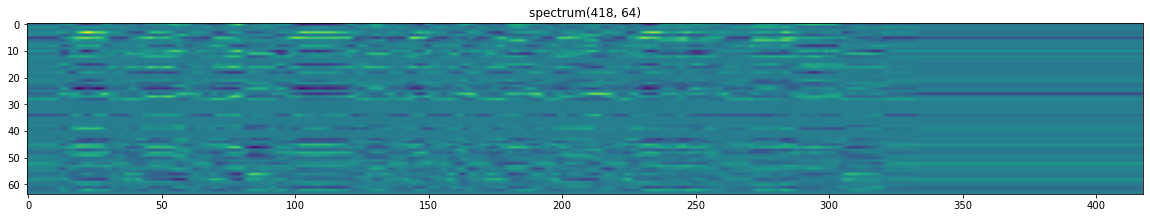

In [36]:
import matplotlib.pyplot as plt

with h5py.File('Spectrum.hdf5', 'r') as f:
    for i in range(int(len(f.keys())/400)):
        plt.figure(figsize=(20,5))
        data = f['tenzor_'+str(i)][:]
        plt.title('spectrum'+str(data.shape))
        plt.imshow(data[:,:].T)
    f.close()